# a) Non-Lineær Regresjon in 2 Dimensions:
Based on [linear-2d](https://gitlab.com/ntnu-tdat3025/regression/linear-2d) by Ole Christian Eidheim.

In [116]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

## Import data from csv

In [117]:
train = pd.read_csv('length_weight.csv')

length = train.iloc[1::,0]
length_list = length.values.tolist()
x_train = torch.tensor(length_list).reshape(-1, 1)

weight = train.iloc[1::,1]
weight_list = weight.values.tolist()
y_train = torch.tensor(weight_list).reshape(-1, 1)

## Define Linear Regression Model class

In [118]:
class LinearRegressionModel:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True)  # requires_grad enables calculation of gradients
        self.b = torch.tensor([[0.0]], requires_grad=True)

    # Predictor
    def f(self, x):
        return x @ self.W + self.b  # @ corresponds to matrix multiplication

    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x), y)

## Optimize with stochastic gradient descent (SGD)
PyTorch's built in optimizer does a lot of the work for us.

In [119]:
model = LinearRegressionModel()

# set variables
scale = 10**(-2)
epoch_count = 10000
step_length = 0.05

# downscale
x_train = x_train * scale
y_train = y_train * scale

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], step_length)

for epoch in range(epoch_count):
    
    model.loss(x_train, y_train).backward()  # Compute loss gradients

    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step


# correct for downscaling
x_train = x_train / scale
y_train = y_train / scale
model.b = model.b / scale

## Visualize data

W = tensor([[0.2386]], requires_grad=True), b = tensor([[-852.6880]], grad_fn=<DivBackward0>), loss = tensor(0.9949, grad_fn=<MseLossBackward>)


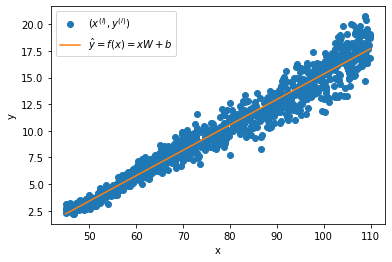

In [120]:
# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b/scale, model.loss(x_train, y_train)))

# clear from previous
plt.figure().clear()

# Visualize result
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')

plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])  # x = [[1], [6]]]

plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()

plt.show()